# Initialisation

In [282]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from random import randint
from collections import Counter
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
nltk.download("stopwords")
nltk.download("punkt")
stopwords_en = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maximer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/maximer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [284]:
print(len(stopwords_en),stopwords_en)

179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [285]:
df = pd.read_csv('src/emotions.csv')

<Axes: >

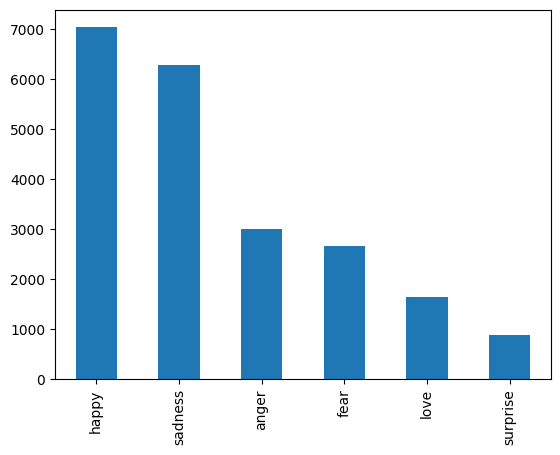

In [286]:
df.Emotion.value_counts().plot.bar()

In [287]:
rand = randint(0,1000)
example_sentence = df.loc[rand,"Text"]
example_emotion = df.loc[rand, "Emotion"]
example_sentence, example_emotion

('i feel hated and not wanted but just be an ignored', 'sadness')

In [288]:
def clean_tokenize(sentence):
    tokens = word_tokenize(sentence)
    final = []
    for t in tokens:
        t=t.lower()
        if t not in stopwords_en and t not in punctuation:
            final.append(t) 
    return final


In [289]:
df["Tokens"] = df["Text"].apply(clean_tokenize)

In [290]:
df.head()

,Text,Emotion,Tokens
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,"[feeling, grouchy]"


In [291]:
df_gb = df.groupby(by="Emotion")

In [292]:
most_commons = {}

for emotion, group in df_gb:
    # Liste les listes de tokens selon "Emotion"
    tokens_list = group['Tokens'].tolist()

    # Crée une seule grande liste contenant tous les mots pour chaque emotion
    all_tokens = [token for sublist in tokens_list for token in sublist]

    #Compte les mots et repertorie les 30 + utilisés
    word_counts = Counter(all_tokens)
    most_common_words = word_counts.most_common(30)

    # Range dans un dictionnaire qui prend l'emotion en clé et qui stocke une liste de 30 tuples
    # pour les 30 mots les + utilisés et leur fréquence
    most_commons[emotion] = most_common_words


top_30_words = {}
for key, value in most_commons.items():
    words = [t[0] for t in value]
    top_30_words[key] = words


In [293]:


# Assuming you have the 'most_commons' dictionary from the previous code
# Convert the most_commons dictionary into a DataFrame
df_most_common = pd.DataFrame(top_30_words)
df_most_common.head(10)

# Transpose the DataFrame to have emotions as rows and words as columns
df_transposed = df_most_common.transpose()

# Calculate the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(df_transposed)

# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=df.columns, columns=df.columns)

# Create a heatmap of the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="YlGnBu")
plt.title("Similarity Metric Heatmap")
plt.xlabel("Emotion")
plt.ylabel("Emotion")
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/maximer/miniconda3/envs/nlp-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/yb/w38bgb0s78z_myxhwyh3_by80000gn/T/ipykernel_63505/4189747389.py", line 10, in <module>
    similarity_matrix = cosine_similarity(df_transposed)
  File "/Users/maximer/miniconda3/envs/nlp-env/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    """Convert type into human readable string."""
  File "/Users/maximer/miniconda3/envs/nlp-env/lib/python3.9/site-packages/sklearn/metrics/pairwise.py", line 1577, in cosine_similarity
  File "/Users/maximer/miniconda3/envs/nlp-env/lib/python3.9/site-packages/sklearn/metrics/pairwise.py", line 156, in check_pairwise_arrays
    X,
  File "/Users/maximer/miniconda3/envs/nlp-env/lib/python3.9/site-packages/sklearn/utils/validation.py", line 917, in check_array
    % (array.

In [294]:
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
anger,feel,feeling,like,im,really,get,people,know,time,little,...,offended,dont,resentful,cold,still,something,irritable,cant,going,bothered
fear,feel,feeling,im,like,little,bit,know,really,anxious,time,...,going,ive,afraid,agitated,scared,frightened,go,weird,things,unsure
happy,feel,feeling,like,im,really,time,know,get,make,people,...,love,even,going,ive,happy,could,day,still,well,dont
love,feel,feeling,like,im,love,really,know,sweet,loving,time,...,little,feelings,tender,lovely,longing,loved,would,need,accepted,nostalgic
sadness,feel,feeling,like,im,really,know,get,would,time,little,...,much,dont,make,day,something,back,going,way,could,pretty
surprise,feel,feeling,like,im,amazed,impressed,curious,overwhelmed,funny,surprised,...,bit,people,would,know,think,one,feels,much,could,life
